In [1]:
# %matplotlib notebook
# %matplotlib tk
import numpy as np 
import matplotlib.pyplot as plt 
import plotly
import plotly.graph_objects as go
import time
import math
from mpl_toolkits import mplot3d

In [2]:
x1=[]
x2=[]
y=[]
label0=[]
label1=[]
f = open("../ass1_data/data/q3/logisticX.csv", "r")

for i in f:
    #print(x.strip())
    ''' a is matrix of m*2 size, where the first column is 1 '''
    i=i.strip()
    temp=i.split(",")
    x1.append(temp[0])
    x2.append(temp[1])

f.close()

f = open("../ass1_data/data/q3/logisticY.csv","r")

for i in f:
    #print(i.strip())
    #y is vector of single dimension
    y.append(i.strip())
f.close()

for i in range(len(y)):
    if(y[i]=="0"):
        label0.append(i)
    elif(y[i]=="1"):
        label1.append(i)

In [3]:
print(type(x2[0]))

<class 'str'>


In [4]:
x0 = np.full(100,1)

In [5]:
x1=np.array(x1).astype(float)
x1m=np.mean(x1)
x1d=np.std(x1)
x1=(x1-x1m)/x1d
x2=np.array(x2).astype(float)
x2m=np.mean(x2)
x2d=np.std(x2)
x2=(x2-x2m)/x2d
y=np.array(y).astype(float)


In [6]:
X=np.column_stack((x0,x1,x2)).T
Y=y.reshape(100,1).T

In [7]:
print(X.shape)
print(Y.shape)

(3, 100)
(1, 100)


In [8]:
theta=[0,0,0]
theta=np.array(theta).astype(float).reshape(3,1)

In [9]:
print(theta.shape)
print(theta.T)

(3, 1)
[[0. 0. 0.]]


In [10]:
# DelL=np.dot( Y-1/(1+np.exp(-1*np.dot(theta.T,X))) , X.T )

In [11]:
# print(DelL)
# print(DelL.shape)

In [12]:
# H=np.zeros([3,3])
# for i in range(100):
#     g = np.exp(-1*np.dot(theta.T,X[:,i:i+1]))[0,0]
#     temp=np.dot(X[:,i:i+1],X[:,i:i+1].T)*g
#     H+=temp
# # print(H)
# Hinv = np.linalg.inv(H) 
# print (H)
# print (Hinv)
# print (np.dot(H,Hinv))

In [13]:
theta=[0,0,0]
theta=np.array(theta).astype(float).reshape(3,1)
theta_old=theta
error=1
j=0
# for j in range(100):
while(error>0.00000003):
    tempH=np.zeros([3,3])
    for i in range(100):
        thetaTX = np.dot(theta.T,X[:,i:i+1])
        g = math.exp(-1*thetaTX[0,0])
#         print(i,thetaTX,g)
        k = -1*g/(1+g)**2
        temp=np.dot(X[:,i:i+1],X[:,i:i+1].T)*k
        tempH+=temp
        
#     print(tempH,"\n")
    tempHinv = np.linalg.inv(tempH) 
    
    tempDelL=np.dot( Y-1/(1+np.exp(-1*np.dot(theta.T,X))) , X.T )
#     print(tempDelL)
    tempT = theta - np.dot(tempHinv,tempDelL.T)
#     print(tempT)
    theta_old=theta
    theta = tempT
    
    error=np.max(np.abs(theta - theta_old))
    j+=1
    print(j,theta,theta_old)

1 [[ 2.76358234e-16]
 [ 8.97341408e-01]
 [-9.20112283e-01]] [[0.]
 [0.]
 [0.]]
2 [[ 0.0916248 ]
 [ 1.54658764]
 [-1.57249997]] [[ 2.76358234e-16]
 [ 8.97341408e-01]
 [-9.20112283e-01]]
3 [[ 0.22925374]
 [ 2.10393545]
 [-2.18620038]] [[ 0.0916248 ]
 [ 1.54658764]
 [-1.57249997]]
4 [[ 0.35177461]
 [ 2.46348281]
 [-2.59033635]] [[ 0.22925374]
 [ 2.10393545]
 [-2.18620038]]
5 [[ 0.39743593]
 [ 2.57939935]
 [-2.71602845]] [[ 0.35177461]
 [ 2.46348281]
 [-2.59033635]]
6 [[ 0.40123187]
 [ 2.58849794]
 [-2.7255376 ]] [[ 0.39743593]
 [ 2.57939935]
 [-2.71602845]]
7 [[ 0.40125316]
 [ 2.5885477 ]
 [-2.72558849]] [[ 0.40123187]
 [ 2.58849794]
 [-2.7255376 ]]
8 [[ 0.40125316]
 [ 2.5885477 ]
 [-2.72558849]] [[ 0.40125316]
 [ 2.5885477 ]
 [-2.72558849]]


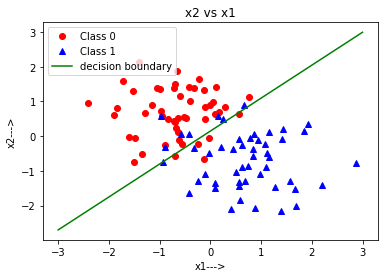

In [14]:
x_label0 = np.array([X[1:3,x] for x in label0])
x_label1 = np.array([X[1:3,x] for x in label1])
plt.plot(x_label0[:, 0], x_label0[:, 1], 'ro', marker='o', label = 'Class 0')
plt.plot(x_label1[:, 0], x_label1[:, 1], 'bo', marker='^', label = 'Class 1')
x_line = np.linspace(-3,3,100)
y_line = (-theta[1,0]*x_line-theta[0,0])/theta[2,0]
plt.plot(x_line,y_line,"green", label="decision boundary")
plt.legend()
plt.xlabel("x1--->")
plt.ylabel("x2--->")
plt.title("x2 vs x1")
plt.show()
